## Stage 2. 탐색적 데이터 분석(EDA)

### 목표

데이터 탐색을 통한 데이터 분석 방향 설정

### Library Import

In [24]:
# Visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', 
    name='NanumBarunGothic')                      
fm.fontManager.ttflist.insert(0, fe)            
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) 
plt.rc('font', family='NanumBarunGothic')
import matplotlib.dates as mdates
import seaborn as sns

# Utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

### 1. 데이터 분석 전 준비

In [3]:
dt_train = pd.read_csv('../data/KOREAN_train4.csv')
dt_train.head()

,시군구,번지,아파트명,전용면적,계약년월,계약일,층,건축년도,도로명,해제사유발생일,...,아파트 한강대교 거리,전세가율,전체계약일자,금리,실질gdp,명목gdp,학군,재개발개수,학급수,여당득표율
0,서울특별시 강남구 개포동,658-1,개포6차우성,79.97,201712,8,3,1987,언주로 3,NaN,...,2823.131513,55.88,20171208,1.5,2.9,"474,957.90",8,0,29.393939,35.36
1,서울특별시 강남구 개포동,658-1,개포6차우성,79.97,201712,22,4,1987,언주로 3,NaN,...,2823.131513,55.88,20171222,1.5,2.9,"474,957.90",8,0,29.393939,35.36
2,서울특별시 강남구 개포동,658-1,개포6차우성,54.98,201712,28,5,1987,언주로 3,NaN,...,2823.131513,55.88,20171228,1.5,2.9,"474,957.90",8,0,29.393939,35.36
3,서울특별시 강남구 개포동,658-1,개포6차우성,79.97,201801,3,4,1987,언주로 3,NaN,...,2823.131513,54.42,20180103,1.5,2.9,"449,357.80",8,0,30.781250,35.36
4,서울특별시 강남구 개포동,658-1,개포6차우성,79.97,201801,8,2,1987,언주로 3,NaN,...,2823.131513,54.42,20180108,1.5,2.9,"449,357.80",8,0,30.781250,35.36


In [4]:
# 데이터 불러오기
dt_train = pd.read_csv('../data/KOREAN_train4.csv')

# '계약년월' 컬럼을 기준으로 필터링
# 201701 이상인 데이터만 선택
filtered_dt_train = dt_train[dt_train['계약년월'] >= 201701]

# 결과 확인
filtered_dt_train.head()

,시군구,번지,아파트명,전용면적,계약년월,계약일,층,건축년도,도로명,해제사유발생일,...,아파트 한강대교 거리,전세가율,전체계약일자,금리,실질gdp,명목gdp,학군,재개발개수,학급수,여당득표율
0,서울특별시 강남구 개포동,658-1,개포6차우성,79.97,201712,8,3,1987,언주로 3,NaN,...,2823.131513,55.88,20171208,1.5,2.9,"474,957.90",8,0,29.393939,35.36
1,서울특별시 강남구 개포동,658-1,개포6차우성,79.97,201712,22,4,1987,언주로 3,NaN,...,2823.131513,55.88,20171222,1.5,2.9,"474,957.90",8,0,29.393939,35.36
2,서울특별시 강남구 개포동,658-1,개포6차우성,54.98,201712,28,5,1987,언주로 3,NaN,...,2823.131513,55.88,20171228,1.5,2.9,"474,957.90",8,0,29.393939,35.36
3,서울특별시 강남구 개포동,658-1,개포6차우성,79.97,201801,3,4,1987,언주로 3,NaN,...,2823.131513,54.42,20180103,1.5,2.9,"449,357.80",8,0,30.781250,35.36
4,서울특별시 강남구 개포동,658-1,개포6차우성,79.97,201801,8,2,1987,언주로 3,NaN,...,2823.131513,54.42,20180108,1.5,2.9,"449,357.80",8,0,30.781250,35.36


In [5]:
filtered_dt_train.columns

Index(['시군구', '번지', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '도로명',
       '해제사유발생일', '거래유형', '중개사소재지', 'k-단지분류', 'k-세대타입(분양형태)', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사', 'k-시행사', 'k-연면적', 'k-주거전용면적',
       'k-전용면적별세대현황60이하', 'k-전용면적별세대현황6085이하', 'k-85135이하', 'k-135초과',
       '세대전기계약방법', '건축면적', '주차대수', '기타의무임대1234', '단지신청일', 'target', '구', '동',
       '전체주소명', '동아파트명', '유동인구', '아파트 지하철역 거리', '1차역세권', '2차역세권',
       '아파트 버스정류장 거리', '좌표X', '좌표Y', '아파트 한강대교 거리', '전세가율', '전체계약일자', '금리',
       '실질gdp', '명목gdp', '학군', '재개발개수', '학급수', '여당득표율'],
      dtype='object')

### 2. 타겟 데이터 살펴보기

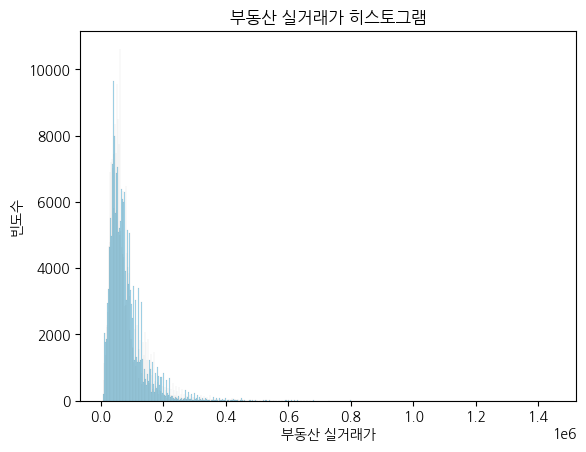

In [6]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 나머지 코드
def str_to_int(string):
    if type(string) == str:
        string = string.replace(',', '')
        return int(string)
    else:
        return string

filtered_dt_train['target'] = filtered_dt_train['target'].apply(str_to_int)
data = filtered_dt_train['target']

# Seaborn을 사용하여 히스토그램 그리기
sns.histplot(data, color='skyblue')

# 그래프에 제목과 축 레이블 추가
plt.title('부동산 실거래가 히스토그램')
plt.xlabel('부동산 실거래가')
plt.ylabel('빈도수')

# 그래프 표시
plt.show()

[결과 해석]
- 부동산 실거래가는 왼쪽으로 쏠려있는 분포를 그리고 있음.
- 오른쪽 긴 꼬리 그래프를 나타내고 있음(Right skewed).
- 집 값이 높은 아파트를 얼마나 정확하게 예측 하느냐가 모델 학습에 있어 가장 어려운 부분이라고 할 수 있음.

In [7]:
target_min = filtered_dt_train['target'].min()
target_max = filtered_dt_train['target'].max()
display(target_max)
display(target_min)

1450000

5400

- target 값의 min max 를 보았을 때 가장 작은 값은 54000000(5400만), 가장 큰 값은 14500000000(145억)임을 알 수 있음.

In [8]:
# target 값의 min max data 살펴보기

max_apt = filtered_dt_train[(filtered_dt_train['target'] == 1450000)]
display(max_apt)
min_apt = filtered_dt_train[(filtered_dt_train['target'] == 5400)]
display(min_apt)

,시군구,번지,아파트명,전용면적,계약년월,계약일,층,건축년도,도로명,해제사유발생일,...,아파트 한강대교 거리,전세가율,전체계약일자,금리,실질gdp,명목gdp,학군,재개발개수,학급수,여당득표율
224567,서울특별시 강남구 청담동,129,PH129,273.96,202204,28,16,2020,압구정로79길 88,NaN,...,594.225962,50.73,20220428,1.5,2.9,"544,239.80",8,0,32.935484,67.01


,시군구,번지,아파트명,전용면적,계약년월,계약일,층,건축년도,도로명,해제사유발생일,...,아파트 한강대교 거리,전세가율,전체계약일자,금리,실질gdp,명목gdp,학군,재개발개수,학급수,여당득표율
405771,서울특별시 구로구 구로동,801-26,성산E동,21.9,201909,4,1,1995,도림로 12-10,NaN,...,3343.125253,65.16,20190904,1.5,2.1,"488,771.20",3,3,33.0,43.59


In [9]:
# 계약년월의 min, max 값 살펴보기

target_min = filtered_dt_train['계약년월'].min()
target_max = filtered_dt_train['계약년월'].max()
display(target_max)
display(target_min)

202306

201701

### 3. '시' 컬럼 탐색

In [10]:
# '시군구' 컬럼을 공백을 기준으로 나누어 '시', '구', '동' 컬럼 생성
dt_train[['시', '구', '동']] = dt_train['시군구'].str.split(' ', expand=True)

# 결과 출력
dt_train[['시', '구', '동']]

,시,구,동
0,서울특별시,강남구,개포동
1,서울특별시,강남구,개포동
2,서울특별시,강남구,개포동
3,서울특별시,강남구,개포동
4,서울특별시,강남구,개포동
...,...,...,...
1118817,서울특별시,은평구,구산동
1118818,서울특별시,은평구,구산동
1118819,서울특별시,은평구,구산동
1118820,서울특별시,은평구,구산동


In [11]:
dt_train['시'].value_counts()

서울특별시    1118822
Name: 시, dtype: int64

### 4. '구' 컬럼 탐색

In [12]:
filtered_dt_train['구'].value_counts()

노원구     41037
송파구     27534
강서구     25061
강남구     23305
구로구     22076
강동구     22032
성북구     21796
양천구     19163
서초구     18499
도봉구     18469
영등포구    17715
성동구     16168
동대문구    15929
마포구     15527
동작구     15015
은평구     14969
중랑구     13765
관악구     13578
서대문구    13439
강북구      8882
용산구      8617
광진구      8168
금천구      7647
중구       5532
종로구      3669
Name: 구, dtype: int64

### 5. '동' 컬럼 탐색

In [13]:
filtered_dt_train['동'].value_counts()

상계동      15999
중계동       9456
구로동       8552
신정동       8408
봉천동       7650
         ...  
필동1가         3
구수동          2
통인동          2
남산동2가        2
입정동          1
Name: 동, Length: 335, dtype: int64

### 6. 아파트 컬럼 탐색 (1)

In [14]:
print('아파트 종류 총 개수', len(filtered_dt_train['아파트명'].unique()))
display(filtered_dt_train['아파트명'].value_counts()[:50])

아파트 종류 총 개수 6330


현대            5803
신동아           4569
한신            3225
두산            3075
벽산            2683
우성            2641
삼성래미안         2331
대림            2189
극동            2048
주공2           2030
삼성            1766
파크리오          1760
대우            1585
에스케이북한산시티     1535
성원            1523
삼익            1454
미성            1388
롯데캐슬          1335
대림e-편한세상      1327
경남아너스빌        1305
중앙하이츠         1303
한진            1273
주공5           1208
동아            1183
쌍용            1181
리센츠           1149
관악드림          1148
청구            1118
잠실엘스          1098
중계그린1단지       1097
관악산벽산타운5      1049
현대1           1029
선사현대          1010
롯데캐슬퍼스트       1002
올림픽훼밀리타운       997
코오롱            996
래미안힐스테이트고덕     988
장미             982
은마             928
삼환             919
동부센트레빌         917
청솔             908
가락쌍용           903
중계무지개          903
우방             878
성산시영           878
건영             870
남산타운           859
우성1            849
현대홈타운          837
Name: 아파트명, dtype: int64

[결과 해석]
- 거래된 아파트 총 종류 : 6330
- 아파트 거래량 : count 수가 많을 수록 거래 활동이 활발하다고 판단 가능
    - 아파트 거래량은 아파트 가격의 선행 지표로 알려져 있으며, 최근 몇 달 사이의 거래량을 확인하여 가격을 예측하는 데 활용할 수 있음

### 7. 아파트 컬럼 탐색 (2)

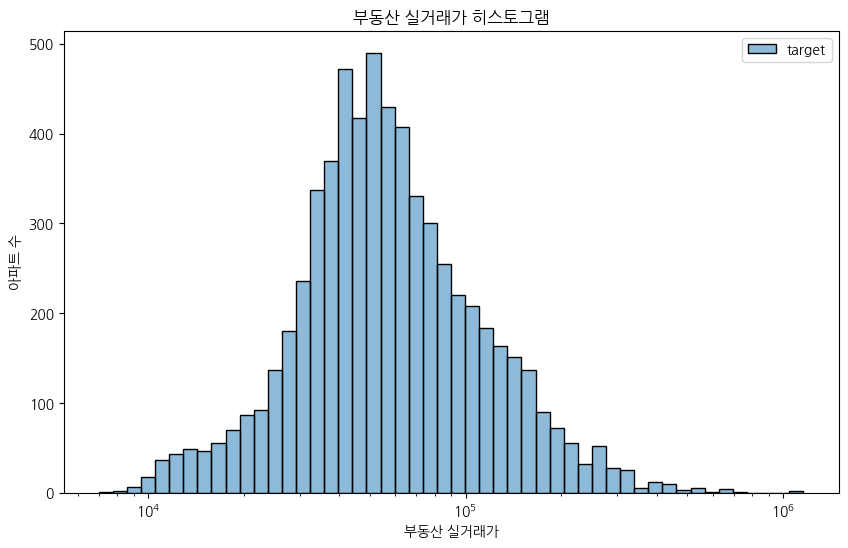

In [15]:
data = filtered_dt_train[['아파트명', 'target']].groupby('아파트명').mean()

# 그래프의 크기를 설정
plt.figure(figsize=(10, 6))

# bins 매개변수를 조정하여 더 많은 막대를 생성
# log_scale 매개변수를 True로 설정하여 가로축을 로그 스케일로 설정
sns.histplot(data, bins=50, log_scale=True, color='skyblue')

# 그래프에 제목과 축 레이블 추가
plt.title('부동산 실거래가 히스토그램')
plt.xlabel('부동산 실거래가')
plt.ylabel('아파트 수')

# 그래프 표시
plt.show()

- 아파트 단지별로 실거래가를 살펴 봤을 때, 1억~10억원 정도의 아파트 단지 수가 가장 많은 것을 확인할 수 있음.
- 10억원 전후의 아파트는 거래수와 단지수가 가장 많다고 할 수 있음.

### 8. 전용면적(㎡) 컬럼 탐색 (1)

In [16]:
print('전용면적 총 개수', len(filtered_dt_train['전용면적'].unique()))
display(filtered_dt_train['전용면적'].value_counts()[:50])

전용면적 총 개수 12702


84.980     7892
84.990     7752
84.970     7657
84.960     7620
59.990     5234
           ... 
116.285      32
182.200      32
103.110      32
93.710       32
50.000       32
Name: 전용면적, Length: 1830, dtype: int64

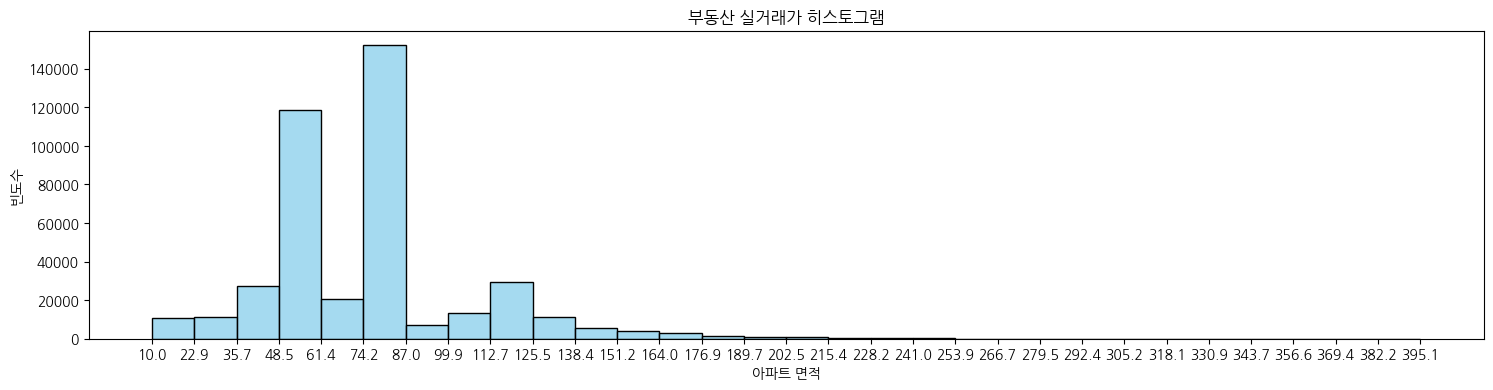

In [17]:
data = filtered_dt_train['전용면적']

num_bins = 30  # 구간의 개수

plt.figure(figsize=(18, 4))
sns.histplot(data, color='skyblue', bins=num_bins)

plt.title('부동산 실거래가 히스토그램')
plt.xlabel('아파트 면적')
plt.ylabel('빈도수')

x_ticks = [min(data) + i * (max(data) - min(data)) / num_bins for i in range(num_bins + 1)]
plt.xticks(x_ticks)

plt.show()

- 51~65 / 79~92 타입의 아파트가 많은 것으로 확인
- 비슷한 값끼리 그룹을 묶어서 볼 필요가 있음

### 9. 전용면적(㎡) 컬럼 탐색 (2)

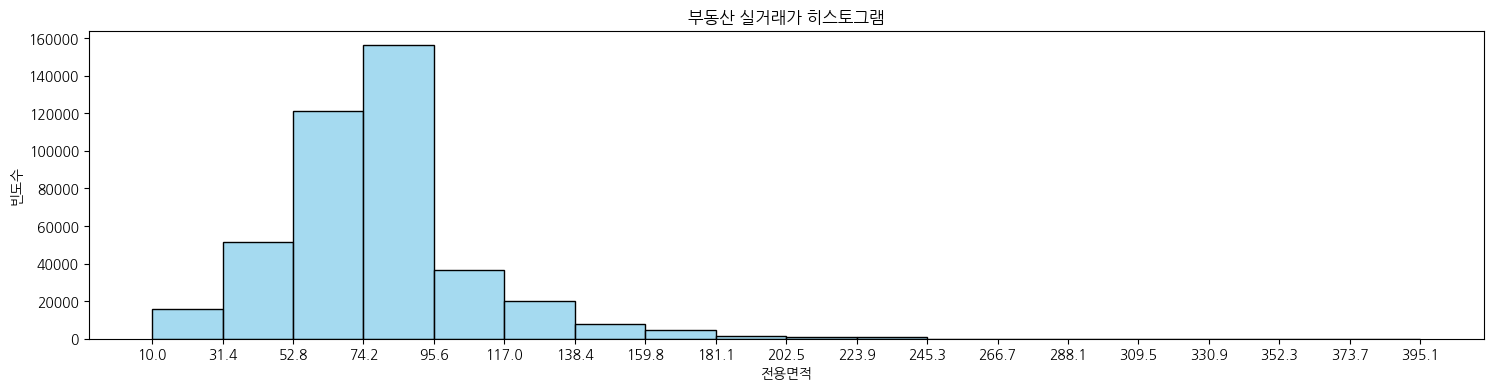

In [18]:
data = filtered_dt_train['전용면적']

num_bins = 18  # 구간의 개수

plt.figure(figsize=(18, 4))
sns.histplot(data, color='skyblue', bins=num_bins)

plt.title('부동산 실거래가 히스토그램')
plt.xlabel('전용면적')
plt.ylabel('빈도수')

x_ticks = [min(data) + i * (max(data) - min(data)) / num_bins for i in range(num_bins + 1)]
plt.xticks(x_ticks)

plt.show()

- 51~93 제곱미터 넓이의 집의 거래량이 가장 많은 것을 확인할 수 있음
- target 데이터와 마찬가지로 왼쪽으로 그래프가 쏠려있음을 확인할 수 있음
- 두 값이 상관관계가 높은지 확인해볼 필요가 있음

### 10. 건축년도 컬럼 탐색

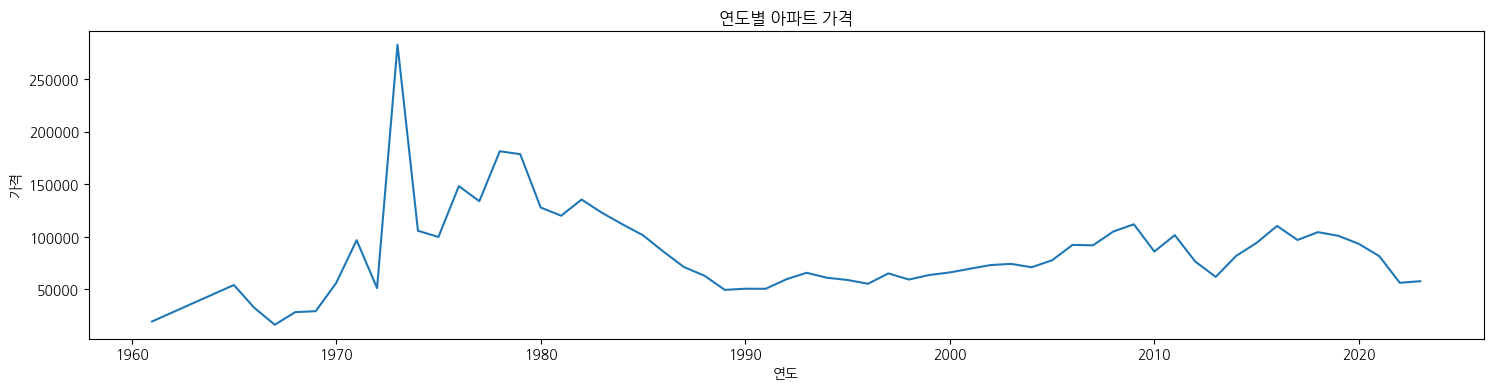

In [19]:
train_yearly = filtered_dt_train.groupby(filtered_dt_train['건축년도'])['target'].mean()

plt.figure(figsize=(18, 4))
plt.plot(train_yearly.index, train_yearly.values)
plt.xlabel('연도')
plt.ylabel('가격')

plt.title('연도별 아파트 가격')
plt.show()

- 건축년도는 1960년부터 2020년까지 다양한 아파트가 존재함.
- 보통 오래된 아파트는 새아파트에 비해 가격이 상대적으로 낮을 수 있을 거라 생각했지만, 그래프를 보면 아파트 가격에 다른 요인들이 더 큰 영향을 미치기에 준공년도의 경향성을 찾기 어려워 보임.

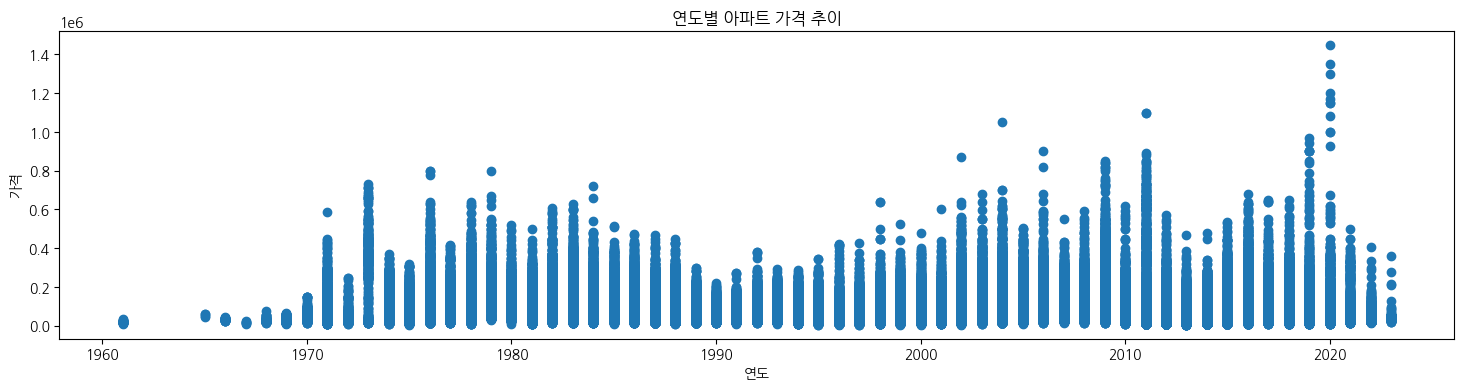

In [20]:
plt.figure(figsize=(18, 4))
plt.scatter(filtered_dt_train['건축년도'], filtered_dt_train['target'])
plt.xlabel('연도')
plt.ylabel('가격')
plt.title('연도별 아파트 가격 추이')
plt.show()

In [21]:
# 1970년대 데이터를 필터링하여 조회
# 1970년대에 건축되고 target 값이 200000을 넘는 아파트의 데이터 필터링
filtered_data = filtered_dt_train[(filtered_dt_train['건축년도'] >= 1970) & (filtered_dt_train['건축년도'] < 1980) & (filtered_dt_train['target'] > 200000)]

filtered_data

,시군구,번지,아파트명,전용면적,계약년월,계약일,층,건축년도,도로명,해제사유발생일,...,아파트 한강대교 거리,전세가율,전체계약일자,금리,실질gdp,명목gdp,학군,재개발개수,학급수,여당득표율
968,서울특별시 강남구 대치동,316,은마,84.43,201809,4,7,1979,삼성로 212,NaN,...,1510.563098,48.88,20180904,1.50,2.4,"485,723.80",8,0,30.781250,35.36
3604,서울특별시 강남구 압구정동,490,한양1차,121.32,201801,4,12,1977,압구정로 321,NaN,...,830.178200,54.42,20180104,1.50,2.9,"449,357.80",8,0,30.781250,35.36
3608,서울특별시 강남구 압구정동,490,한양1차,78.05,201801,31,8,1977,압구정로 321,NaN,...,830.178200,54.42,20180131,1.50,2.9,"449,357.80",8,0,30.781250,35.36
3609,서울특별시 강남구 압구정동,490,한양1차,78.05,201802,12,11,1977,압구정로 321,NaN,...,830.178200,53.33,20180212,1.50,2.9,"449,357.80",8,0,30.781250,35.36
3610,서울특별시 강남구 압구정동,490,한양1차,91.21,201802,24,3,1977,압구정로 321,NaN,...,830.178200,53.33,20180224,1.50,2.9,"449,357.80",8,0,30.781250,35.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535581,서울특별시 용산구 이촌동,300-23,한강맨숀,167.21,201703,6,2,1971,이촌로 248,NaN,...,1678.263177,62.61,20170306,1.25,3.1,"433,086.10",5,0,23.933333,52.33
535583,서울특별시 용산구 이촌동,300-23,한강맨숀,167.21,201703,20,3,1971,이촌로 248,NaN,...,1678.263177,62.61,20170320,1.25,3.1,"433,086.10",5,0,23.933333,52.33
535590,서울특별시 용산구 이촌동,300-23,한강맨숀,178.78,201705,12,2,1971,이촌로 248,NaN,...,1678.263177,61.73,20170512,1.25,2.8,"454,226.70",5,0,23.933333,39.33
535598,서울특별시 용산구 이촌동,300-23,한강맨숀,167.21,201706,30,3,1971,이촌로 248,NaN,...,1678.263177,60.92,20170630,1.25,2.8,"454,226.70",5,0,23.933333,39.33


### 11. 날짜 데이터 전처리

- 계약일 + 계약년월 => 계약날짜 만들기
- datetime 형태는 비교 연산이 가능하기 때문(시계열 데이터 다룰 때 편리)

In [22]:
def preprocess_tran_date(x):
    if type(x) == int:
        if x < 10:
            return '0'+str(x)
        else:
            return str(x)
    else:
        return x

filtered_dt_train['계약일'] = filtered_dt_train['계약일'].apply(preprocess_tran_date)
filtered_dt_train['계약날짜'] = filtered_dt_train['계약년월'].astype(int).astype(str) + filtered_dt_train['계약일'].astype(str)
filtered_dt_train['계약날짜'] = pd.to_datetime(filtered_dt_train['계약날짜'])
filtered_dt_train = filtered_dt_train.sort_values('계약날짜').reset_index(drop=True)

### 12. 날짜별 타켓 데이터 시각화

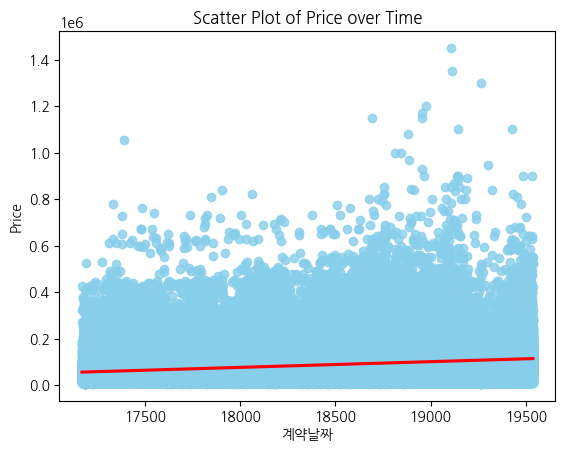

In [27]:
# Scatter Plot 그리기
sns.regplot(
    x=filtered_dt_train['계약날짜'].map(mdates.date2num),
    y=filtered_dt_train['target'],
    scatter_kws={'color': 'skyblue'},
    line_kws={'color': 'red'}
)

# x축과 y축 레이블 설정
plt.xlabel('계약날짜')
plt.ylabel('Price')

# 그래프 제목 설정
plt.title('Scatter Plot of Price over Time')

# 그래프 보여주기
plt.show()

[결과 해석]
- 미세하게 우상향 하는 모습을 보임.
- 군을 세부적으로 나누어서 군 별로 추이를 살펴볼 필요가 있음.

#### target 을 기준으로 데이터를 두 그룹으로 나누기

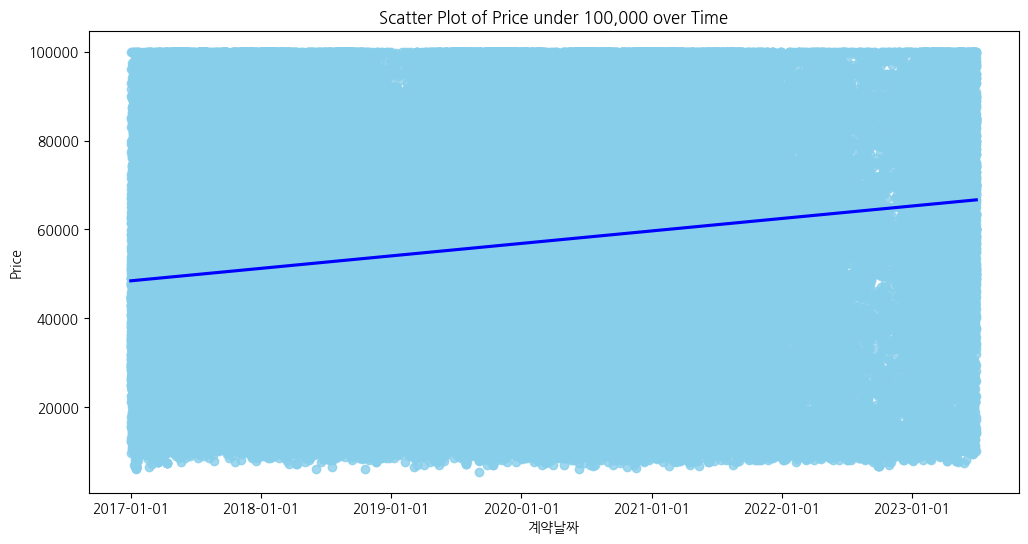

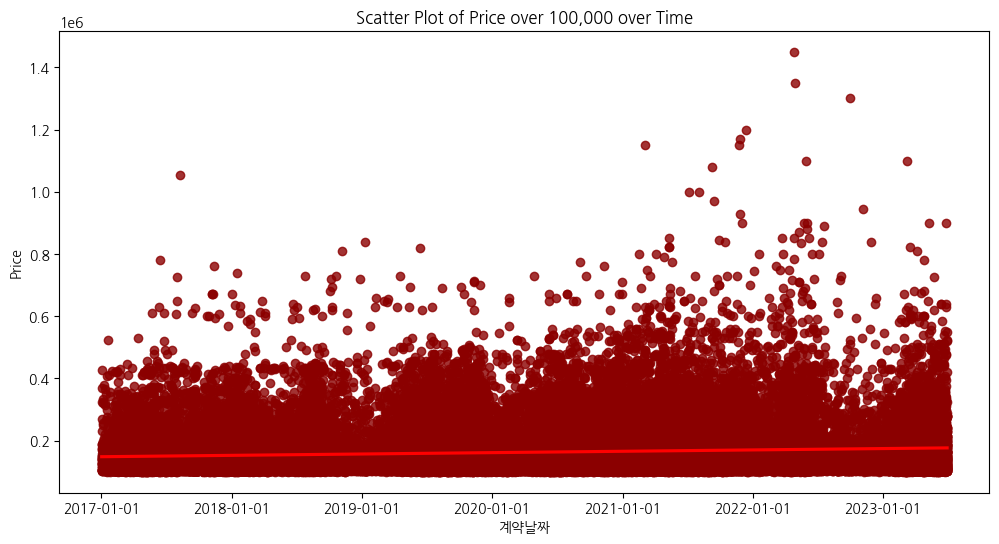

In [28]:
# target 기준으로 데이터를 두 그룹으로 나눔
threshold = 100000
group1 = filtered_dt_train[filtered_dt_train['target'] <= threshold]
group2 = filtered_dt_train[filtered_dt_train['target'] > threshold]

# 첫 번째 그룹(100000 이하)의 산점도 그래프
plt.figure(figsize=(12, 6))
sns.regplot(
    x=group1['계약날짜'].map(mdates.date2num),
    y=group1['target'],
    scatter_kws={'color': 'skyblue'},
    line_kws={'color': 'blue'}
)
plt.xlabel('계약날짜')
plt.ylabel('Price')
plt.title('Scatter Plot of Price under 100,000 over Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

# 두 번째 그룹(100000 초과)의 산점도 그래프
plt.figure(figsize=(12, 6))
sns.regplot(
    x=group2['계약날짜'].map(mdates.date2num),
    y=group2['target'],
    scatter_kws={'color': 'darkred'},
    line_kws={'color': 'red'}
)
plt.xlabel('계약날짜')
plt.ylabel('Price')
plt.title('Scatter Plot of Price over 100,000 over Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()


[결과 해석]
- 100000이하 100000초과 두 군으로 나누어 보았을 때 100000이하의 그룹에서는 눈에 띄게 우상향 하는 경향이 보임.
- 100000초과 그룹에서는 여전히 시계열의 경향을 찾아볼 수 없음.

#### target을 기준으로 데이터를 세 그룹으로 나누기

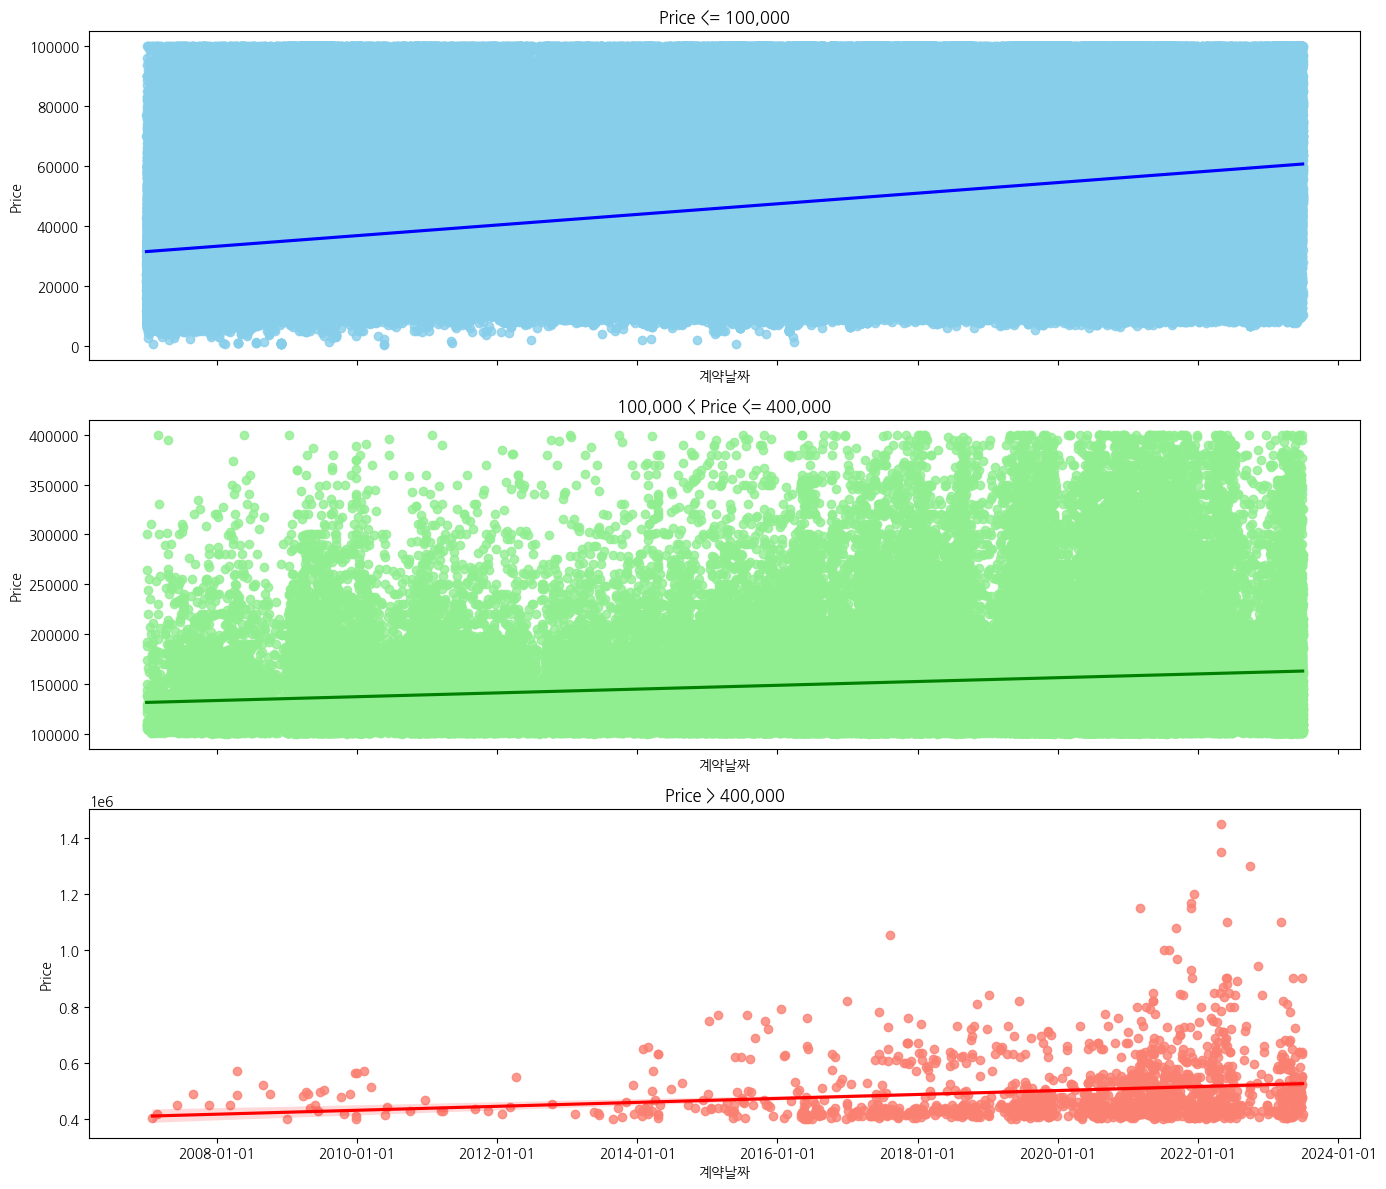

In [ ]:
# 가격대별로 데이터를 분할
group_1 = filtered_dt_train[filtered_dt_train['target'] <= 100000]  # 100,000 이하
group_2 = filtered_dt_train[(filtered_dt_train['target'] > 100000) & (filtered_dt_train['target'] <= 400000)]  # 100,000 초과 400,000 이하
group_3 = filtered_dt_train[filtered_dt_train['target'] > 400000]  # 400,000 초과

# 그래프를 그리기 위한 설정
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# 각 그룹에 대한 산점도와 회귀선 그리기
sns.regplot(
    x=group_1['계약날짜'].map(mdates.date2num),
    y=group_1['target'],
    ax=axs[0],
    scatter_kws={'color': 'skyblue'},
    line_kws={'color': 'blue'}
)
axs[0].set_title('Price <= 100,000')
axs[0].set_ylabel('Price')

sns.regplot(
    x=group_2['계약날짜'].map(mdates.date2num),
    y=group_2['target'],
    ax=axs[1],
    scatter_kws={'color': 'lightgreen'},
    line_kws={'color': 'green'}
)
axs[1].set_title('100,000 < Price <= 400,000')
axs[1].set_ylabel('Price')

sns.regplot(
    x=group_3['계약날짜'].map(mdates.date2num),
    y=group_3['target'],
    ax=axs[2],
    scatter_kws={'color': 'salmon'},
    line_kws={'color': 'red'}
)
axs[2].set_title('Price > 400,000')
axs[2].set_ylabel('Price')

# x축에 날짜 형식을 지정
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.tight_layout()
plt.show()


- 전체 데이터를 통째로 봤을 때는 경향이 보이지 않았음. (y축의 범위가 너무 차이나기 때문에)
- target 군을 3그룹으로 나눠서 봄.
    - 1. 10억 이하
    - 2. 10억 초과 40억 이하
    - 3. 40억 초과
    - 1 그룹에서 명확하게 우상향 하는 것을 확인 가능함.
    - 2, 3 그룹에서도 미세하게 우상향하는 모습을 확인할 수 있음.

- 해당 그룹 나눠서 1, 0 / 1, 2, 0 으로 분류하여 feature 를 생성해서 LSTM 적용해보기

#### target 을 기준으로 데이터를 네 그룹으로 나누기

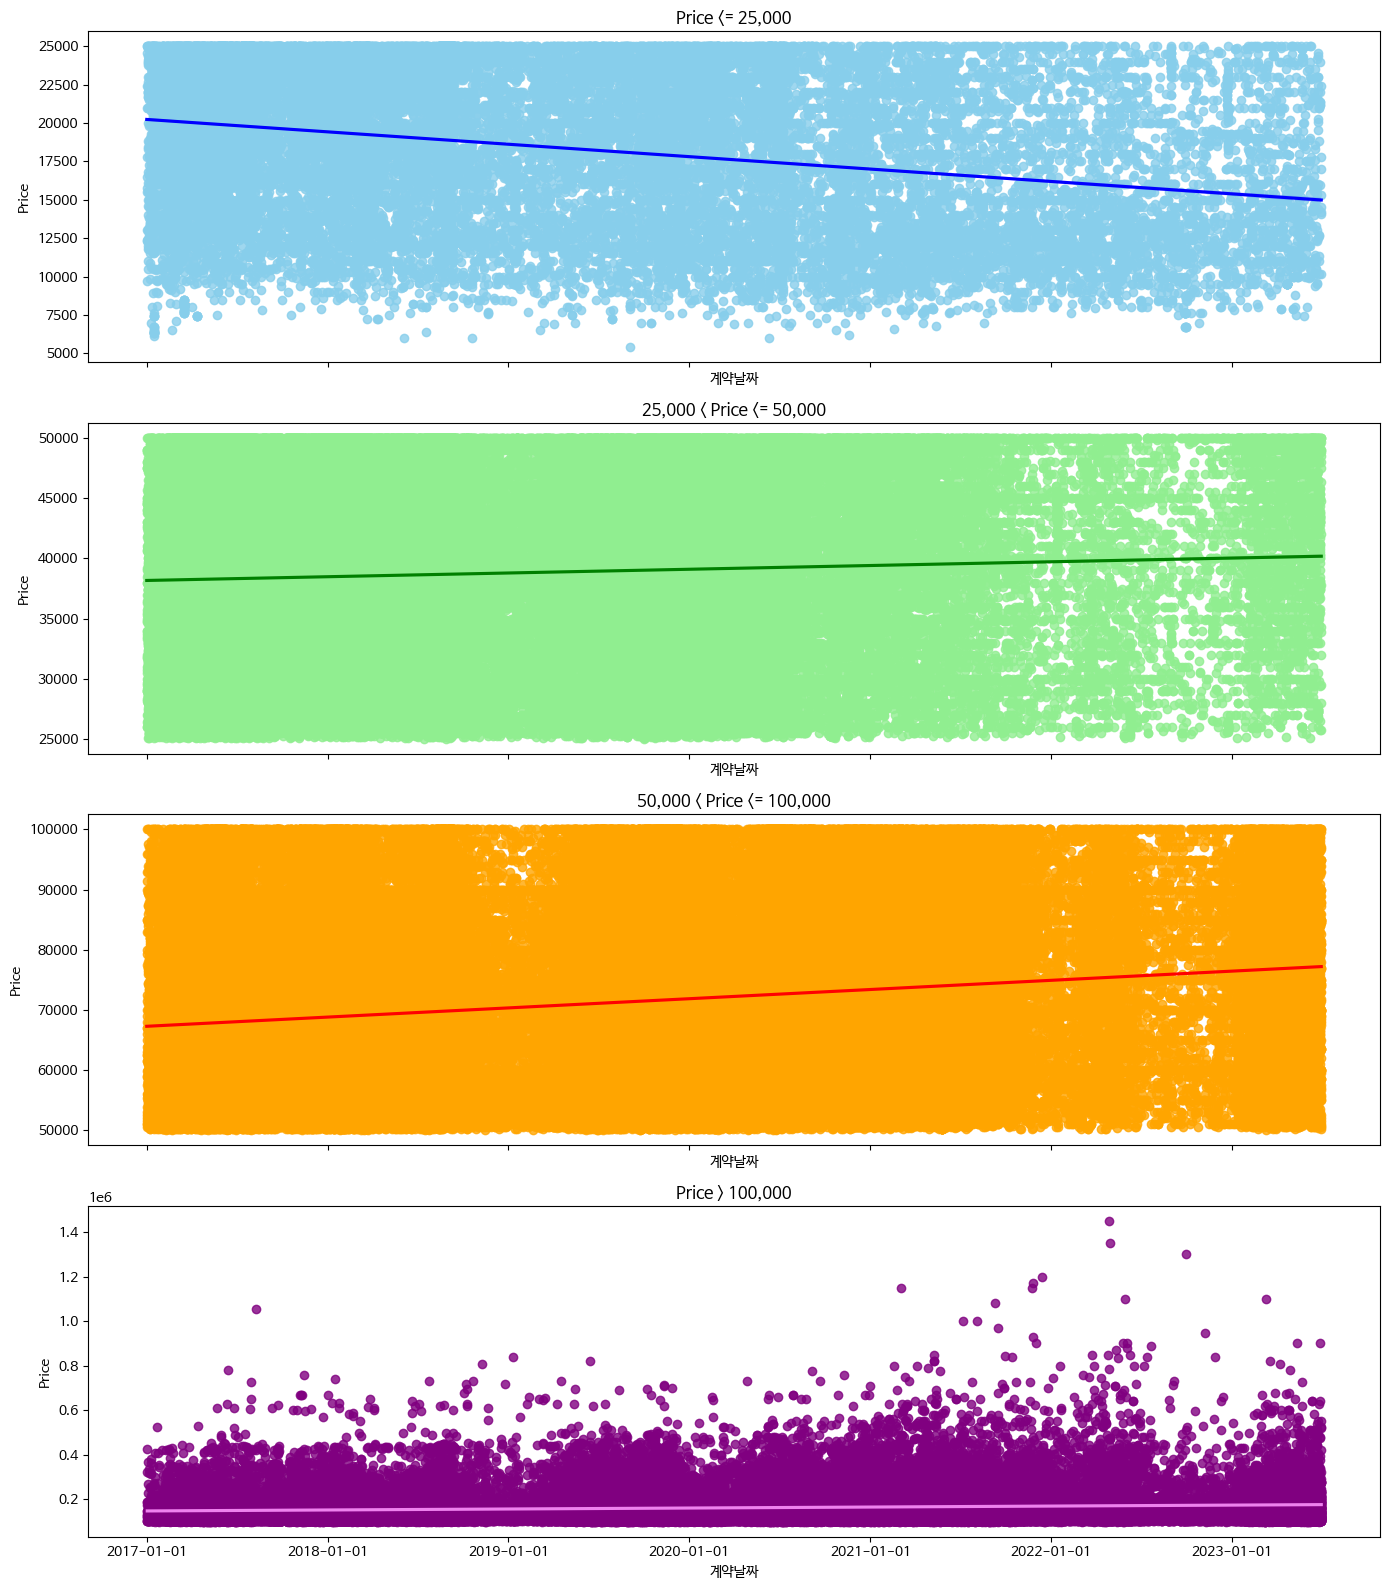

In [25]:
# 새로운 가격대별로 데이터를 분할
group_1 = filtered_dt_train[filtered_dt_train['target'] <= 25000]  # 2억 5천 이하
group_2 = filtered_dt_train[(filtered_dt_train['target'] > 25000) & (filtered_dt_train['target'] <= 50000)]  # 2억 5천 초과 ~ 5억 이하
group_3 = filtered_dt_train[(filtered_dt_train['target'] > 50000) & (filtered_dt_train['target'] <= 100000)]  # 5억 초과 ~ 10억 이하
group_4 = filtered_dt_train[filtered_dt_train['target'] > 100000]  # 10억 초과

# 그래프를 그리기 위한 설정
fig, axs = plt.subplots(4, 1, figsize=(14, 16), sharex=True)

# 각 그룹에 대한 산점도와 회귀선 그리기
sns.regplot(
    x=group_1['계약날짜'].map(mdates.date2num),
    y=group_1['target'],
    ax=axs[0],
    scatter_kws={'color': 'skyblue'},
    line_kws={'color': 'blue'}
)
axs[0].set_title('Price <= 25,000')
axs[0].set_ylabel('Price')

sns.regplot(
    x=group_2['계약날짜'].map(mdates.date2num),
    y=group_2['target'],
    ax=axs[1],
    scatter_kws={'color': 'lightgreen'},
    line_kws={'color': 'green'}
)
axs[1].set_title('25,000 < Price <= 50,000')
axs[1].set_ylabel('Price')

sns.regplot(
    x=group_3['계약날짜'].map(mdates.date2num),
    y=group_3['target'],
    ax=axs[2],
    scatter_kws={'color': 'orange'},
    line_kws={'color': 'red'}
)
axs[2].set_title('50,000 < Price <= 100,000')
axs[2].set_ylabel('Price')

sns.regplot(
    x=group_4['계약날짜'].map(mdates.date2num),
    y=group_4['target'],
    ax=axs[3],
    scatter_kws={'color': 'purple'},
    line_kws={'color': 'violet'}
)
axs[3].set_title('Price > 100,000')
axs[3].set_ylabel('Price')

# x축에 날짜 형식을 지정
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.tight_layout()
plt.show()

[결과 해석]
- target 값을 4군으로 나누었을 때 (2억 5천 이하 / 2억 5천 - 5억 / 5억 - 10억 / 10억 초과)
- 2억 5천인 군의 경우 우하향 하는 그래프를 보였음(갯수의 영향인 건지 원인을 찾아볼 필요가 있음)
- 나머지 군에서는 우상향 하거나 미세하게 우상향 하는 경향을 보였음

### 13. floor 데이터 탐색

- 1층 이하의 경우 다른 층에 비해서 target 값이 낮을 것이라 예상하여 '층' 변수를 탐색해 봄

In [30]:
print('1층 이하: ', filtered_dt_train[(filtered_dt_train['층'] < 2) & (filtered_dt_train['동'] == '대치동') & (filtered_dt_train['전용면적'] > 60)]['target'].mean())
print('2층 이상: ', filtered_dt_train[(filtered_dt_train['층'] >= 2) & (filtered_dt_train['동'] == '대치동') & (filtered_dt_train['전용면적'] > 60)]['target'].mean())

1층 이하:  194137.77777777778
2층 이상:  213321.6189481017


In [31]:
# '동'에 대해 그룹화하고, '층'의 조건에 따라 필터링하여 'target'의 평균을 계산
first_floor_avg = filtered_dt_train[(filtered_dt_train['층'] < 2) & (filtered_dt_train['전용면적'] > 50)].groupby('동')['target'].mean()
higher_floors_avg = filtered_dt_train[(filtered_dt_train['층'] >= 2) & (filtered_dt_train['전용면적'] > 50)].groupby('동')['target'].mean()

# 두 평균을 DataFrame으로 병합
floors_comparison = pd.DataFrame({'1층 이하': first_floor_avg, '2층 이상': higher_floors_avg})

# 결과 출력
print(floors_comparison)

              1층 이하          2층 이상
동                                 
가락동    85760.122699   98905.723807
가리봉동   35133.333333   36601.388889
가산동    42157.500000   48472.902542
가양동    65646.875000   72896.743660
갈월동    90000.000000   79050.000000
...             ...            ...
효창동    65104.000000   91878.375465
후암동    72969.354839   79012.681159
휘경동    53475.757576   59642.171642
흑석동   102389.215686  112651.578947
흥인동             NaN  108163.288660

[322 rows x 2 columns]


[결과 해석]
- 2층 이상의 target 값 평균에 비해 1층 이하의 경우 낮은 target 값을 나타냈음
- '층' 변수가 target 값에 미세하게 영향을 미치는 것으로 보임

#### 층 범주 feature 생성하기

In [37]:
filtered_dt_train['층_범주'] = filtered_dt_train['층'].apply(lambda x: '1층' if x == 1 else '2층이상')

filtered_dt_train[['층', '층_범주']].head()

,층,층_범주
0,1,1층
1,17,2층이상
2,13,2층이상
3,15,2층이상
4,11,2층이상


### 14. 구별 target 값 탐색

In [22]:
# 구별로 'target' 평균값 계산
target_mean_by_gu = dt_train.groupby('구')['target'].mean()

target_mean_by_gu

구
강남구     114847.461503
강동구      54402.872801
강북구      38316.975201
강서구      44215.453701
관악구      41954.133039
광진구      67158.379293
구로구      38605.012447
금천구      33709.248647
노원구      33870.444730
도봉구      31924.613711
동대문구     45194.761822
동작구      60936.451058
마포구      64445.226137
서대문구     49082.573688
서초구     113608.653390
성동구      68924.389400
성북구      45117.779038
송파구      83868.032920
양천구      59042.132927
영등포구     56137.342464
용산구     105876.961900
은평구      43721.691848
종로구      57674.032963
중구       62084.985733
중랑구      35195.762819
Name: target, dtype: float64

In [23]:
# 결과를 평균값이 높은 순으로 정렬하고 순위를 매김
ranked_targets = target_mean_by_gu.sort_values(ascending=False).reset_index()
ranked_targets['순위'] = ranked_targets['target'].rank(ascending=False)

ranked_targets

,구,target,순위
0,강남구,114847.461503,1.0
1,서초구,113608.653390,2.0
2,용산구,105876.961900,3.0
3,송파구,83868.032920,4.0
4,성동구,68924.389400,5.0
5,광진구,67158.379293,6.0
6,마포구,64445.226137,7.0
7,중구,62084.985733,8.0
8,동작구,60936.451058,9.0
9,양천구,59042.132927,10.0


[결과 해석]
- '구' 별로 target 값의 평균을 확인하여 순위를 매김
- 강남구, 서초구, 용산구, 송파구 순으로 target 값의 평균이 높은 것을 확인할 수 있었음.

### Heatmap

- 변수간의 상관성을 확인하기 위해 Heatmap 을 그려봄.

/tmp/ipykernel_448281/3245476142.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = filtered_dt_train.corr()


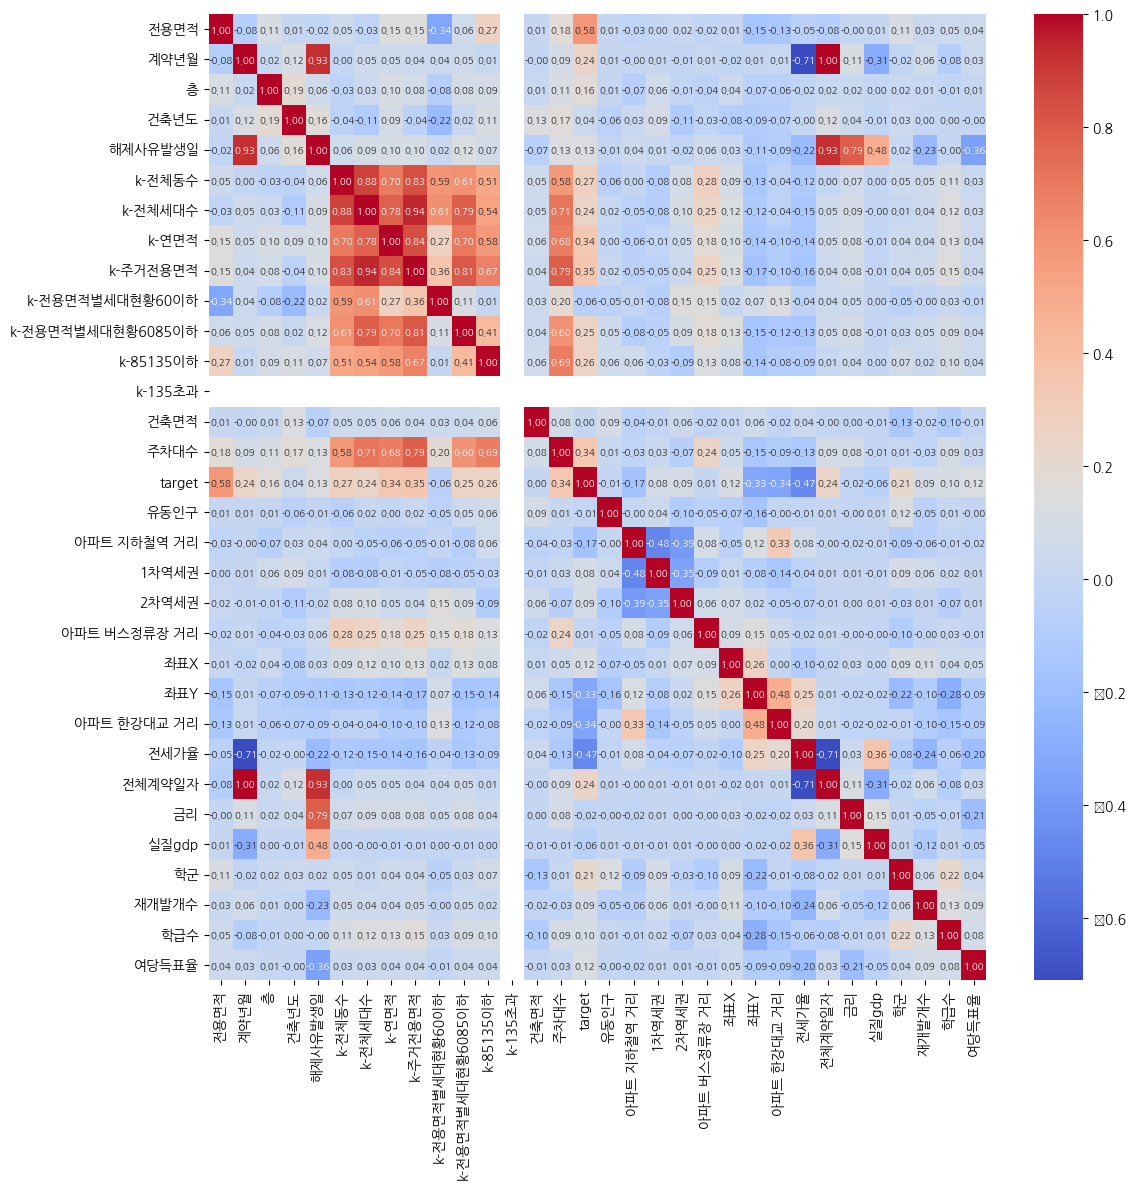

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬 계산
corr = filtered_dt_train.corr()

# 히트맵 생성
plt.figure(figsize=(12, 12))  # 히트맵의 크기 설정
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            annot_kws={"size": 7})  # 모든 셀에 상관계수 표시, 글자 크기 8로 설정

# 레이아웃 설정
plt.tight_layout()
# 그래프 표시
plt.show()
